<a href="https://www.kaggle.com/code/heyrobin/spaceship-titanic-a-cosmic-mystery?scriptVersionId=93718559" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><img src="https://github.com/heyrobin/Space-Titanic/blob/main/Banner-optimized.gif?raw=true">

# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤIntroductionㅤ</span><a id="1"></a> 

In the beginning, October 4, 1957, Sputnik the first satellite launched to space, and then on 1 Dec 1958 NASA was formed since the space race began from Neil Armstrong Edwin & "Buzz" Aldrin became the first humans ever to land on the moon to the Elon musk the first person to successfully completing the mission to the mars it became the race of curiosity but this is all history.

In the year 2912, We've received a transmission from four lightyears away and things aren't looking good. Spaceship Titanic is an interstellar passenger liner named after the great titanic with 13,000 passengers on board transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

Mission: We have been summoned by the ISO (intergalactic scientist organization) to rescue crews and retrieve the lost passengers which were transported by the anomaly. We have given records and data recovered from the spaceship's damaged computer system.

<h4><b><span style="color:#C5315F"> Data Defination</span><br>
<h5><i>Personal records for about two-thirds (~8700) of the passengers, to be used as training data.<i>

<ul><li><code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form <code>gggg_pp</code> where <code>gggg</code> indicates a group the passenger is travelling with and <code>pp</code> is their number within the group. People in a group are often family members, but not always.</li>
<li><code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.</li>
<li><code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</li>
<li><code>Cabin</code> - The cabin number where the passenger is staying. Takes the form <code>deck/num/side</code>, where <code>side</code> can be either <code>P</code> for <em>Port</em> or <code>S</code> for <em>Starboard</em>.</li>
<li><code>Destination</code> - The planet the passenger will be debarking to.</li>
<li><code>Age</code> - The age of the passenger.</li>
<li><code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.</li>
<li><code>RoomService</code>, <code>FoodCourt</code>, <code>ShoppingMall</code>, <code>Spa</code>, <code>VRDeck</code> - Amount the passenger has billed at each of the <em>Spaceship Titanic</em>'s many luxury amenities.</li>
<li><code>Name</code> - The first and last names of the passenger.</li>
<li><code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</li></ul>

# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤ🌠 Exploritory Data Analysisㅤ</span><a id="1"></a> 

<center><img src="https://github.com/heyrobin/Space-Titanic/blob/main/homeplanets.gif?raw=true">

<h4><b><span style="color:#C5315F"> Planets in the Dataset </span><br>
<h5><i>lets talk about planets<i>

<code>Earth</code> : Earth is the third planet from the Sun and the only astronomical object known to harbor life. While large amounts of water can be found throughout the Solar System, only Earth sustains liquid surface water. About 71% of Earth's surface is made up of the ocean, dwarfing Earth's polar ice, lakes, and rivers. The remaining 29% of Earth's surface is land, consisting of continents and islands. Earth's surface layer is formed of several slowly moving tectonic plates, interacting to produce mountain ranges, volcanoes, and earthquakes.<br>
<code>55 Cancri e</code> : An exoplanet in the orbit of its Sun-like host star 55 Cancri A. The mass of the exoplanet is about 8.63 Earth masses and its diameter is about twice that of the Earth, thus classifying it as the first super-Earth discovered around a main sequence star, predating Gliese 876 d by a year.<br>
<code>PSO J318.5−22</code> : a rogue planet, an extrasolar object of planetary mass that does not orbit a parent star. It is approximately 80 light-years away and belongs to the Beta Pictoris moving group. The object was discovered in 2013 in images taken by the Pan-STARRS PS1 wide-field telescope.<br><br>
<code>TRAPPIST-1e</code> : Also designated as 2MASS J23062928-0502285 e, is a solid, close-to-Earth-sized exoplanet orbiting within the habitable zone around the ultracool dwarf star TRAPPIST-1 approximately 40 light-years away from Earth in the constellation of Aquarius.<br>
<code>Europa</code> : Europa, or Jupiter II, is the smallest of the four Galilean moons orbiting Jupiter, and the sixth-closest to the planet of all the 80 known moons of Jupiter. It is also the sixth-largest moon in the Solar System.<br>
<code>Mars</code> : Mars is the fourth planet from the Sun and the second-smallest planet in the Solar System, being larger than only Mercury. In English, Mars carries the name of the Roman god of war and is often called the "Red Planet".

In [1]:
'''Analysis'''

import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

'''Pre-Processing'''
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

'''Modeling-Metrics'''
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#viz parameters
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.3
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";


'''Dataset'''
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
#spliting the feature
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
test[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

train.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)
test.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)

I splited the Cabin feature to multiple feature to analyze it further

<h2><b><span style="color:#55D3E2">|</span> Description </b>

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Num           8494 non-null   object 
 13  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train["Num"] = train["Num"].astype('float64')
train["CryoSleep"] = train["CryoSleep"].astype('bool')
train["VIP"] = train["VIP"].astype('bool')

test["Num"] = test["Num"].astype('float64')
test["CryoSleep"] = test["CryoSleep"].astype('bool')
test["VIP"] = test["VIP"].astype('bool')

Changing the datatypes of some columns

<h2><b><span style="color:#55D3E2">|</span> Missing Values </b>

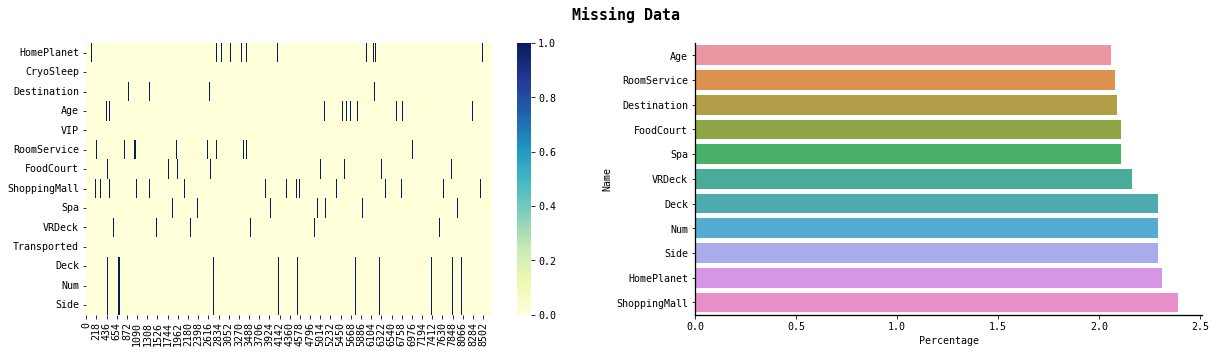

In [5]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
fig.suptitle('Missing Data', size = 15, weight='bold')

#first plot
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",ax=axes[0])


#missing data
missing = round(train.isna().sum()/train.shape[0]* 100 ,2)
missing = missing[missing>0].sort_values().to_frame()
missing.columns = ['Percentage']
missing.index.names = ['Name']
missing = missing.reset_index()


sns.barplot(data = missing, y= 'Name', x = 'Percentage',ax=axes[1])
plt.show()

* We have some missing data in the dataset
* The missing data is distributed.

<h2><b><span style="color:#55D3E2">|</span> Target Value </b>

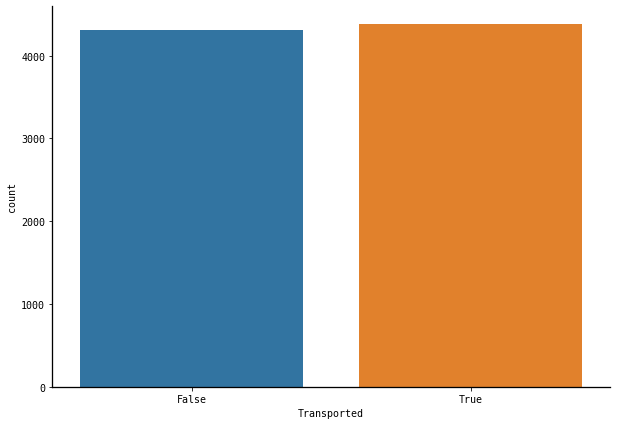

In [6]:
sns.countplot(train["Transported"]);

very balanced target variable

<h2><b><span style="color:#55D3E2">|</span> Categorical and Numerical Columns </b>

In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


#Data
cnt_srshp =train['HomePlanet'].value_counts()
cnt_srsdes =train['Destination'].value_counts()


fig = make_subplots(rows=2, cols=2, shared_yaxes=True,
    subplot_titles=("Home Planets","Destination Planets","VIP","CryoSleep"))

#figure1
fig.add_trace(go.Scatter(
    x=cnt_srshp.index,
    y=cnt_srshp.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 20,
        size = cnt_srshp.values,
        color = ['#1D7595','#B9B596','#864D29'])),
              1, 1)

#figure2
fig.add_trace(go.Scatter(
    x=cnt_srsdes.index,
    y=cnt_srsdes.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 20,
        size = cnt_srsdes.values,
        color = ['#048B95','#A1231F','#602F58'])),
              1, 2)


fig.add_trace(go.Histogram(x=train["VIP"]),
                 row=2, col=1)

fig.add_trace(go.Histogram(x=train["CryoSleep"]),
                 row=2, col=2)



fig.update_layout(height=1000,width=1600, coloraxis=dict(colorscale='Bluered_r'), showlegend=False,
    title_x=0.9,
    titlefont=dict(size = 2, color='black', family='Space Mono'),
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()



In [8]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608.0,S


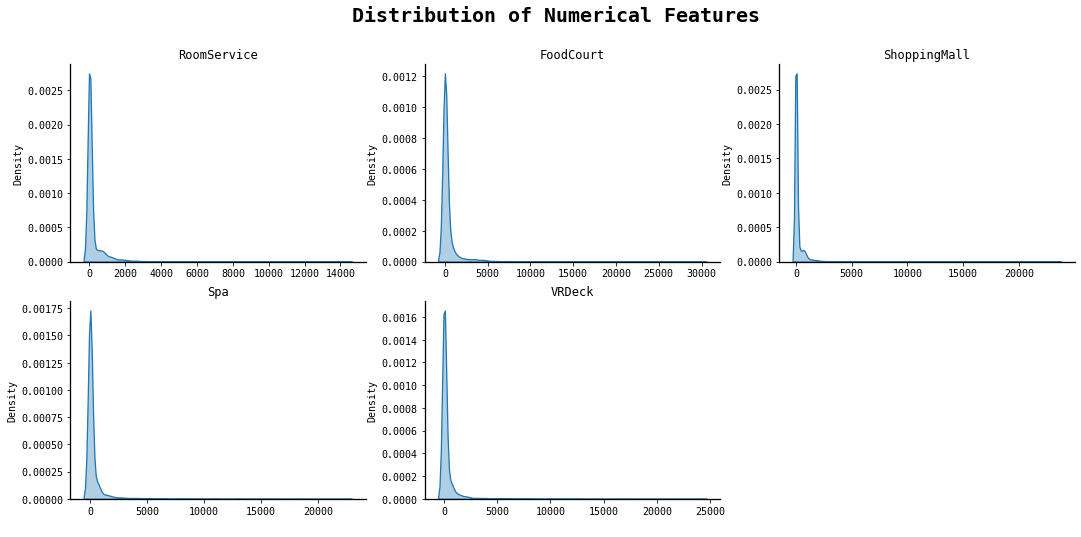

In [9]:
cols = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

plt.figure(figsize= (18,8))

for i in cols:
    plt.suptitle('Distribution of Numerical Features', size = 20, weight='bold')
    plt.subplot(a, b, c)
    A=sns.kdeplot(train[i],
                  #color=theme1[1],
                  linewidth = 1.3,shade=True, alpha=0.35)
    plt.title(i)
    plt.xlabel(" ")
    c = c + 1

<h2><b><span style="color:#55D3E2">|</span> Cabin </b>

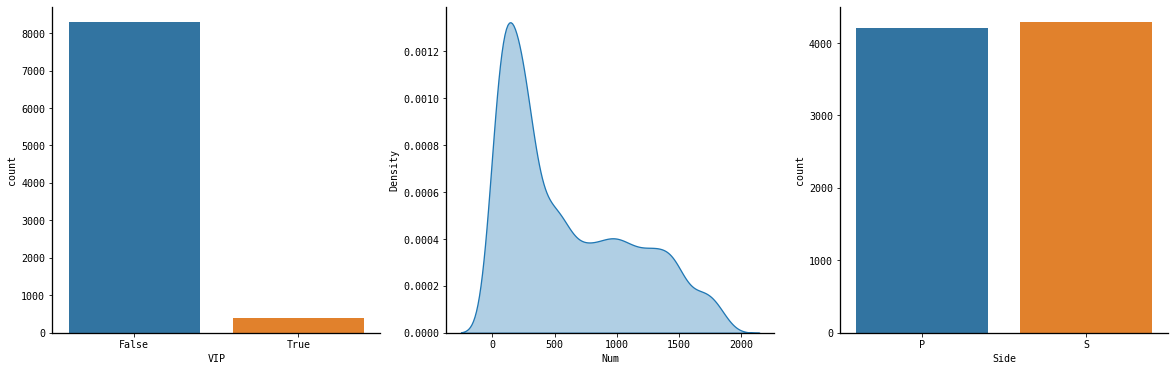

In [10]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

sns.countplot(train["VIP"], ax=axes[0])
sns.kdeplot(train["Num"],
                  linewidth = 1.3,shade=True, alpha=0.35, ax=axes[1])
sns.countplot(train["Side"], ax=axes[2])

plt.show()

<h2><b><span style="color:#55D3E2">|</span> Age </b>

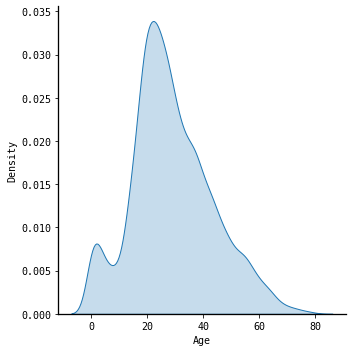

In [11]:
sns.displot(train,x='Age',kind='kde', fill=True);

# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤPre- Processingㅤ</span><a id="1"></a> 

In [12]:
# getting categorical and numerical features
cat_col = [col for col in train.columns if train[col].dtype in ["object"]]
num_col = [col for col in train.columns if train[col].dtype in ["int64","float64"]]

In [13]:
cat_col

['HomePlanet', 'Destination', 'Deck', 'Side']

In [14]:
num_col

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']

### **Handling Missing Values**

In [15]:
print(f'train dataset has : {train[num_col+cat_col].isna().sum().sum()} and test : {test[num_col+cat_col].isna().sum().sum()} missing values')

train dataset has : 2102 and test : 1076 missing values


In [16]:
(train.isna().sum()/train.shape[0]*100).sort_values()

CryoSleep       0.000000
VIP             0.000000
Transported     0.000000
Age             2.059128
RoomService     2.082135
Destination     2.093639
FoodCourt       2.105142
Spa             2.105142
VRDeck          2.162660
Deck            2.289198
Num             2.289198
Side            2.289198
HomePlanet      2.312205
ShoppingMall    2.392730
dtype: float64

In [17]:
#Numerical
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=0, max_iter=20, initial_strategy='mean')

train[num_col] = imputer.fit_transform(train[num_col])
test[num_col] = imputer.fit_transform(test[num_col])



In [18]:
#categorial

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

train[cat_col] = imp.fit_transform(train[cat_col])
test[cat_col] = imp.fit_transform(test[cat_col])

In [19]:
train[cat_col+num_col].isna().sum()

HomePlanet      0
Destination     0
Deck            0
Side            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Num             0
dtype: int64

<AxesSubplot:xlabel='Side', ylabel='count'>

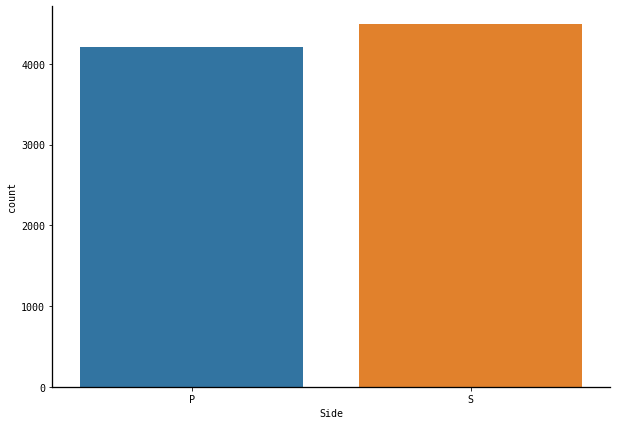

In [20]:
sns.countplot(train['Side'])

In [21]:
#train[num_col] = train[num_col].fillna(0)
#test[num_col] = test[num_col].fillna(0)

train[cat_col] = train[cat_col].fillna('Missing')
test[cat_col] = test[cat_col].fillna('Missing')

print(f'train : {train[num_col+cat_col].isna().sum().sum()}, test : {test[num_col+cat_col].isna().sum().sum()}')

train : 0, test : 0


we imputed all the missing values

In [22]:
#converting float datatype to integer
train[num_col] = train[num_col].astype(int)
test[num_col] = test[num_col].astype(int)

### **Handling Outliers**

skewness : 0.4252870796971421


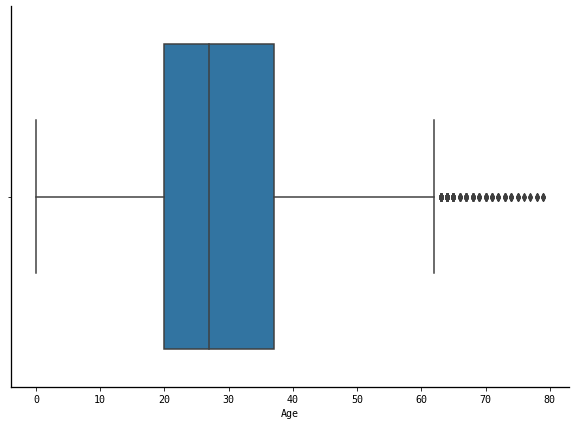

skewness : 6.39751447952428


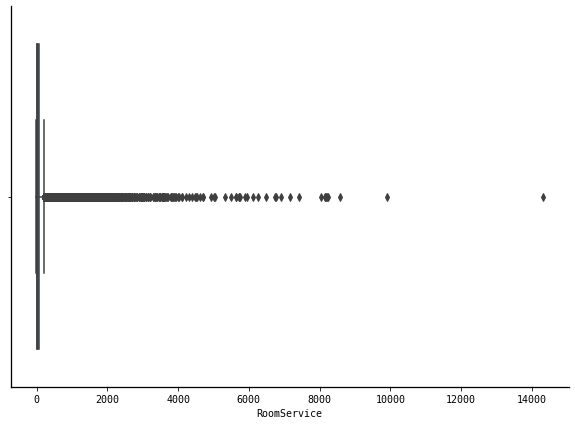

skewness : 7.160689806743204


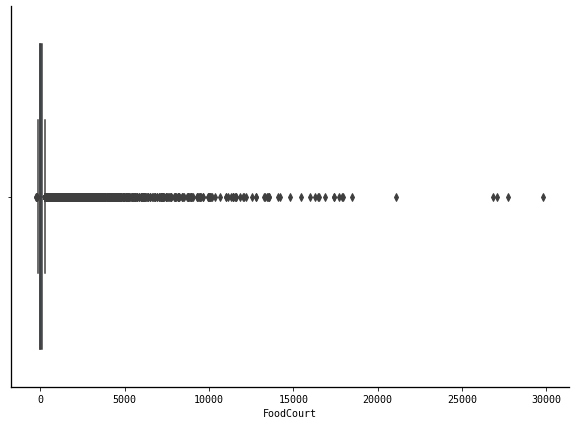

skewness : 12.777719772235605


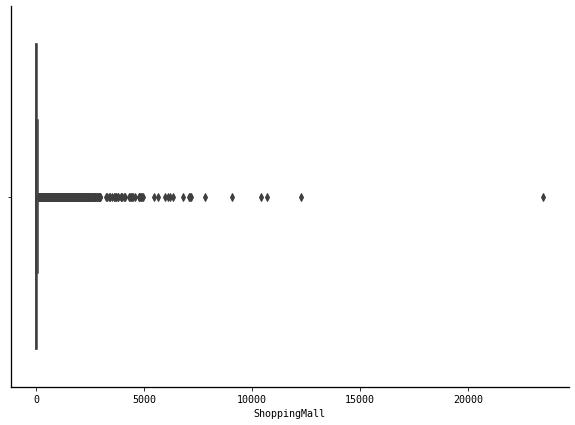

skewness : 7.703502623985451


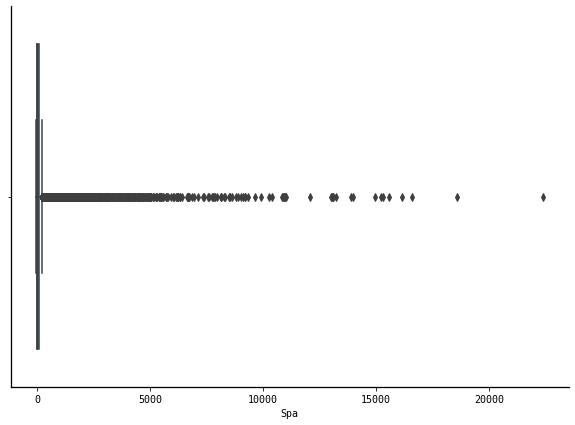

skewness : 7.8988758060248685


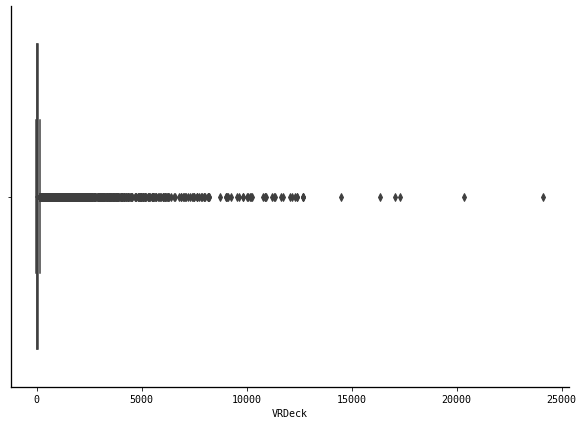

skewness : 0.7241312625026844


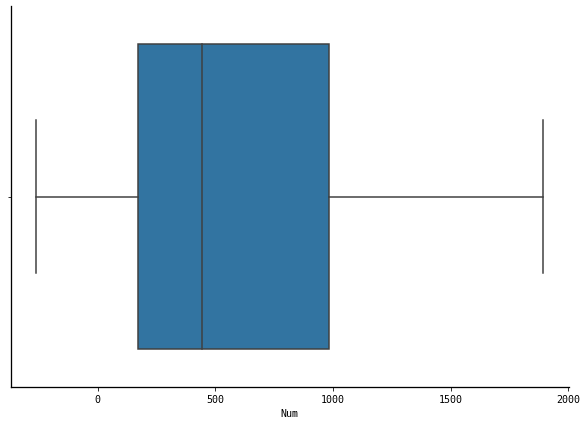

In [23]:
from scipy.stats import skew

for col in num_col:
    sns.boxplot(train[col])
    print(f'skewness : {skew(train[col])}')
    plt.show()

In [24]:

from sklearn.preprocessing import MinMaxScaler

train[num_col] = MinMaxScaler().fit_transform(train[num_col])
test[num_col] = MinMaxScaler().fit_transform(test[num_col])

In [25]:
def label_encoder(df,df2,columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df2[col] = df2[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])
        df2[col] =  LabelEncoder().fit_transform(df2[col])
    return df

label_encoder(train,test,cat_col)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,False,2,0.493671,False,0.001255,0.008151,0.000000,0.002093,0.000911,False,1,0.121114,0
1,0,False,2,0.303797,False,0.008853,0.008450,0.001064,0.026542,0.002732,True,5,0.121114,1
2,1,False,2,0.734177,True,0.004252,0.127121,0.000000,0.301136,0.002939,False,0,0.121114,1
3,1,False,2,0.417722,False,0.001255,0.050835,0.015793,0.150345,0.008901,False,0,0.121114,1
4,0,False,2,0.202532,False,0.022377,0.010480,0.006428,0.027255,0.000994,True,5,0.121578,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,False,0,0.518987,True,0.001255,0.235012,0.000000,0.075262,0.003974,False,0,0.166589,0
8689,0,True,1,0.227848,False,0.001255,0.008151,0.000000,0.002093,0.000911,False,6,0.816705,1
8690,0,False,2,0.329114,False,0.001255,0.008151,0.079687,0.002138,0.000911,True,6,0.817169,1
8691,1,False,0,0.405063,False,0.001255,0.043050,0.000000,0.017813,0.134838,False,4,0.403248,1


In [26]:
train["Transported"]

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

<AxesSubplot:>

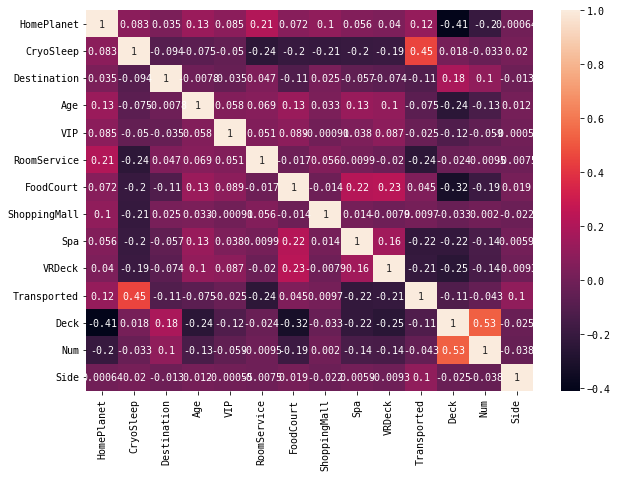

In [27]:
sns.heatmap(train.corr(), annot=True)

# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤ🛸 Modelㅤ</span><a id="1"></a> 

In [28]:
X = train.drop('Transported', axis=1)
y = train['Transported']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
models = {"LogisticClassifier":LogisticRegression(solver='liblinear'),
          "KNearest": KNeighborsClassifier(),
          "Support Vector Classifier": SVC(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "XGBClassifier":XGBClassifier(),
          "LightLGBM Classifier":LGBMClassifier()
          }

In [31]:
for name, vals in models.items():
    model = vals.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f'{name} accuracy is {score}')

LogisticClassifier accuracy is 0.7476472638550018
KNearest accuracy is 0.737887765772046
Support Vector Classifier accuracy is 0.7232485186476124
DecisionTreeClassifier accuracy is 0.7357964447542698
[12:38:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier accuracy is 0.7922621122342279
LightLGBM Classifier accuracy is 0.801673056814221


## Hyper Parameter Tuning

In [32]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
             
      n_estimators = trial.suggest_int("n_estimators", 50, 200)
      learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
      #num_leaves = trial.suggest_int("num_leaves", 20, 3000, step=20)
      max_depth = trial.suggest_int("max_depth", 3, 12)
      #min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 200, 10000, step=100)
      #lambda_l1 = trial.suggest_int("lambda_l1", 0, 100, step=5)
      #lambda_l2 = trial.suggest_int("lambda_l2", 0, 100, step=5)
      #min_gain_to_split = trial.suggest_float("min_gain_to_split", 0, 15)
      #bagging_fraction = trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1)
      #bagging_freq = trial.suggest_categorical("bagging_freq", [1])
      #feature_fraction = trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
        
      lgbc = LGBMClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            learning_rate=learning_rate,
                            #num_leaves =num_leaves,
                            #min_data_in_leaf=min_data_in_leaf,
                            #lambda_l1=lambda_l1,
                            #lambda_l2=lambda_l2,
                            #min_gain_to_split=min_gain_to_split,
                            #bagging_fraction=bagging_fraction,
                            #bagging_freq=bagging_freq,
                            #feature_fraction=feature_fraction
                           )
    
      return cross_val_score(lgbc,
                             X,
                             y,
                             n_jobs=-1,
                             cv=10).mean()
                             
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100,)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

print("Best hyperparameters: {}".format(trial.params))

best_params = trial.params

[I 2022-04-22 12:38:02,696] A new study created in memory with name: no-name-609001a4-5b8d-4afb-a7e5-484167604899
[I 2022-04-22 12:38:07,122] Trial 0 finished with value: 0.7906457415711017 and parameters: {'n_estimators': 54, 'learning_rate': 0.0966133926129458, 'max_depth': 10}. Best is trial 0 with value: 0.7906457415711017.
[I 2022-04-22 12:38:07,896] Trial 1 finished with value: 0.7786807401822677 and parameters: {'n_estimators': 99, 'learning_rate': 0.19011070534581098, 'max_depth': 6}. Best is trial 0 with value: 0.7906457415711017.
[I 2022-04-22 12:38:08,961] Trial 2 finished with value: 0.7954761054455511 and parameters: {'n_estimators': 157, 'learning_rate': 0.04617091682550129, 'max_depth': 5}. Best is trial 2 with value: 0.7954761054455511.
[I 2022-04-22 12:38:10,102] Trial 3 finished with value: 0.7819032313532532 and parameters: {'n_estimators': 120, 'learning_rate': 0.12891007514641775, 'max_depth': 10}. Best is trial 2 with value: 0.7954761054455511.
[I 2022-04-22 12:38

Accuracy: 0.8028352049521844
Best hyperparameters: {'n_estimators': 144, 'learning_rate': 0.03195844155624469, 'max_depth': 4}


In [33]:
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_slice(study)

In [34]:
best_params

{'n_estimators': 144, 'learning_rate': 0.03195844155624469, 'max_depth': 4}

In [35]:
scores=[]
lgbc = LGBMClassifier(
    **best_params
).fit(X_train, y_train)
y_pred = lgbc.predict(X_test)
score=accuracy_score(y_test,y_pred)
scores.append(score)
print(score)

0.7999302892994075


In [36]:
scores

[0.7999302892994075]

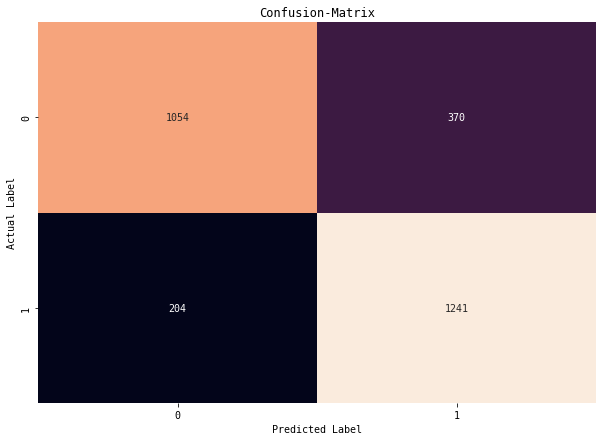

In [37]:
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot = True,
                cbar= False,
                fmt='g',
               #cmap= theme
               )
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion-Matrix');

In [38]:
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
sub['Transported'] = lgbc.predict(test)
sub.to_csv('submission.csv',index=False)
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤ🚧 Work in Progress 🚧ㅤ</span><a id="1"></a> 